In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt



# Insert warehouse name here
warehouse_name = "OE"
# Insert user id here
user = "betsyfrdmn"
# GitHub repo
base = "Lucas_Systems_Capstone_Project"

# Load your processed data
df = pd.read_parquet(f"/Users/{user}/{base}/data/processed/oe_detailed.parquet")

Mean Squared Error: 1.0551
R-Squared: 0.6001

Feature Importances:
        Feature  Importance
1  log_distance    0.659059
0    log_weight    0.322170
2         Level    0.018771


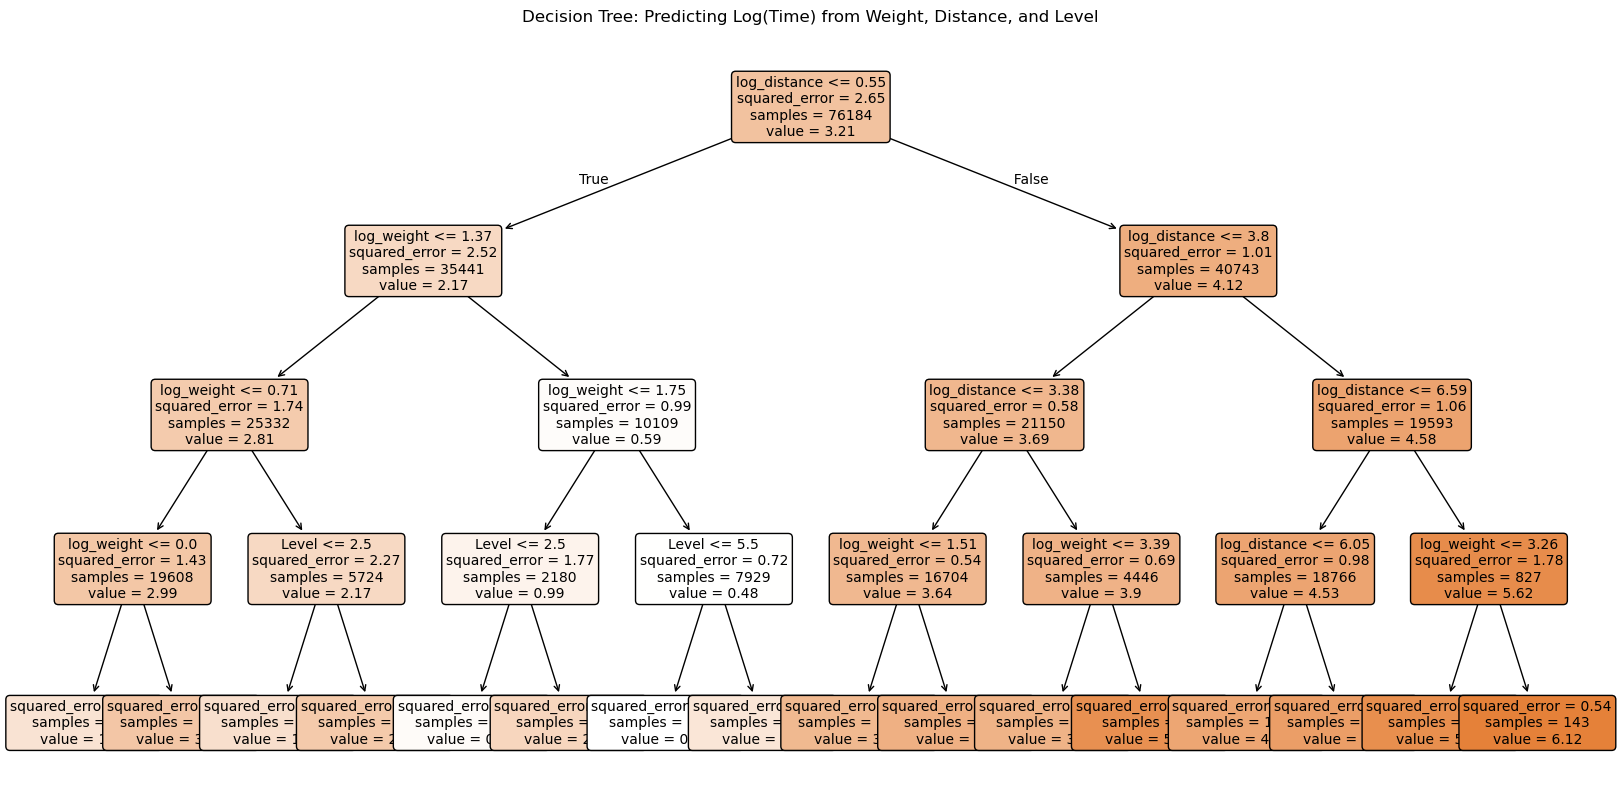

In [15]:
# Convert Data Types
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Travel_Distance'] = pd.to_numeric(df['Travel_Distance'], errors='coerce')
df['Time_Delta_sec'] = pd.to_numeric(df['Time_Delta_sec'], errors='coerce')
df['Level'] = pd.to_numeric(df['Level'], errors='coerce')

# Create log transformations (using log1p to handle zeros safely)
df['log_time'] = np.log1p(df['Time_Delta_sec'].fillna(0))
df['log_weight'] = np.log1p(df['Weight'].fillna(0))
df['log_distance'] = np.log1p(df['Travel_Distance'].fillna(0))

# Select Features and Target
features = ['log_weight', 'log_distance', 'Level']
target = 'log_time'

# Drop rows where essential data is missing (e.g., the very first task in a session)
df_model = df.dropna(subset=[target] + features)

X = df_model[features]
y = df_model[target]

# Split data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize and Train the Decision Tree, max_depth is restricted to 4 so the tree remains readable
model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=4)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared: {r2:.4f}")

# Visualize the Tree
plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=features, 
          filled=True, 
          rounded=True, 
          precision=2, 
          fontsize=10)
plt.title("Decision Tree: Predicting Log(Time) from Weight, Distance, and Level")
plt.savefig('warehouse_decision_tree.png')

# 8. Feature Importance
importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
print("\nFeature Importances:")
print(importance.sort_values(by='Importance', ascending=False))

In [16]:

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [5, 20, 50]
}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 5}


Mean Squared Error: 0.9529
R-Squared: 0.6388

Feature Importances:
        Feature  Importance
1  log_distance    0.621249
0    log_weight    0.351204
2         Level    0.027547


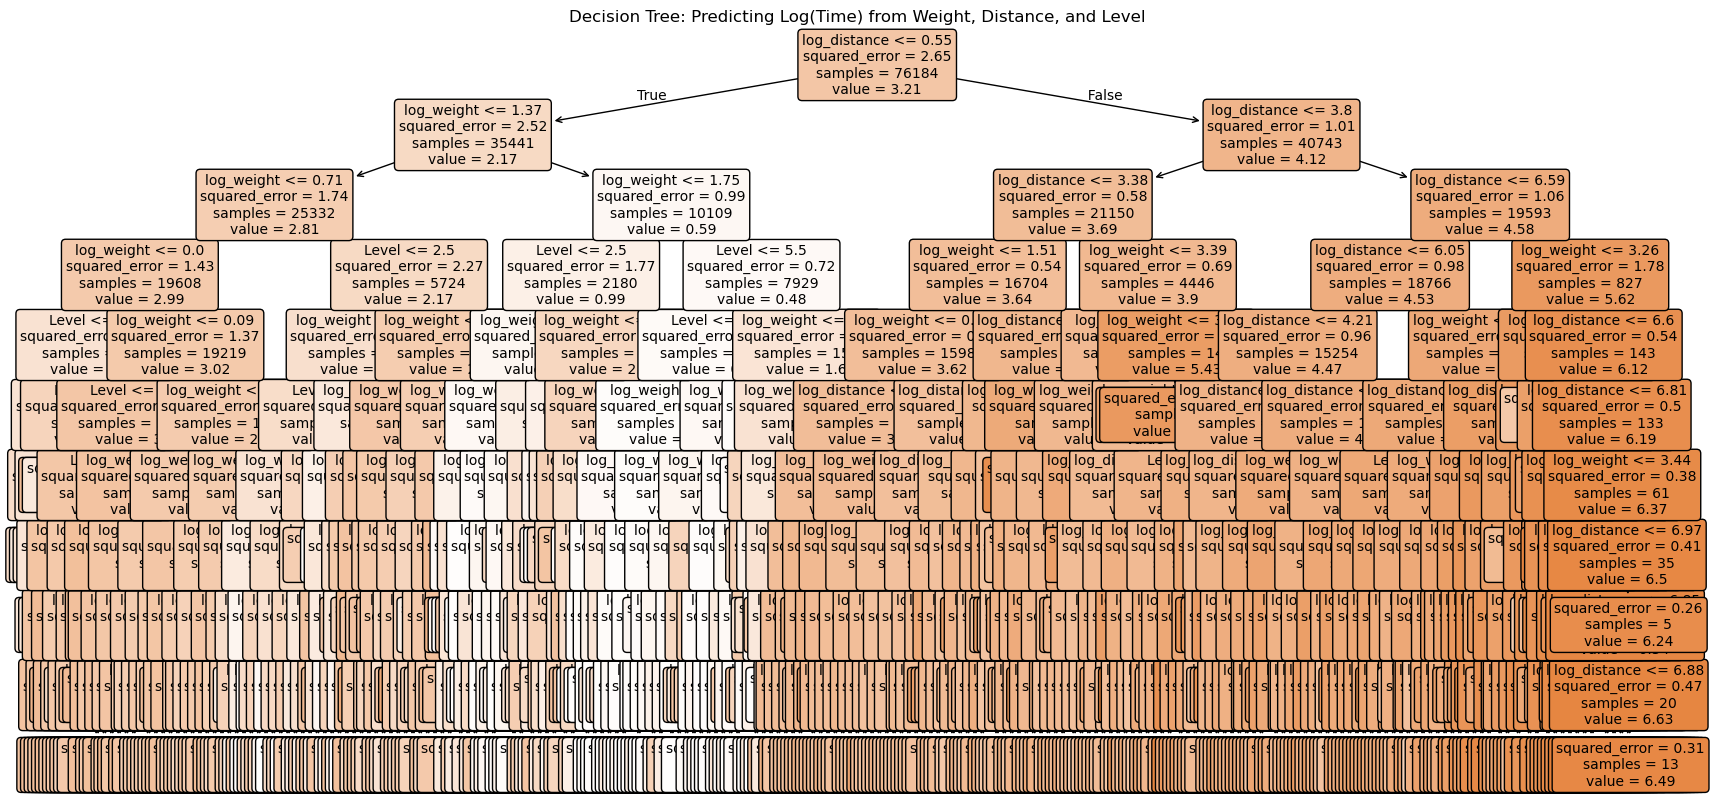

In [17]:
# Convert Data Types
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Travel_Distance'] = pd.to_numeric(df['Travel_Distance'], errors='coerce')
df['Time_Delta_sec'] = pd.to_numeric(df['Time_Delta_sec'], errors='coerce')
df['Level'] = pd.to_numeric(df['Level'], errors='coerce')

# Create log transformations (using log1p to handle zeros safely)
df['log_time'] = np.log1p(df['Time_Delta_sec'].fillna(0))
df['log_weight'] = np.log1p(df['Weight'].fillna(0))
df['log_distance'] = np.log1p(df['Travel_Distance'].fillna(0))

# Select Features and Target
features = ['log_weight', 'log_distance', 'Level']
target = 'log_time'

# Drop rows where essential data is missing (e.g., the very first task in a session)
df_model = df.dropna(subset=[target] + features)

X = df_model[features]
y = df_model[target]

# Split data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize and Train the Decision Tree, max_depth is restricted to 4 so the tree remains readable
model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=4)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared: {r2:.4f}")

# Visualize the Tree
plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=features, 
          filled=True, 
          rounded=True, 
          precision=2, 
          fontsize=10)
plt.title("Decision Tree: Predicting Log(Time) from Weight, Distance, and Level")
plt.savefig('warehouse_decision_tree.png')

# 8. Feature Importance
importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
print("\nFeature Importances:")
print(importance.sort_values(by='Importance', ascending=False))